In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 8

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 8)                 88        
                                                                 
Total params: 1,158
Trainable params: 1,158
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/8 [==>...........................] - ETA: 3s - loss: 2.1012 - accuracy: 0.1172
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 1s 30ms/step - loss: 2.1021 - accuracy: 0.1074 - val_loss: 2.0046 - val_accuracy: 0.1728
Epoch 2/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.0615 - accuracy: 0.1641
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 2.0631 - accuracy: 0.1395 - val_loss: 1.9723 - val_accuracy: 0.3056
Epoch 3/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.9996 - accuracy: 0.1797
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 2.0194 - accuracy: 0.1827 - val_loss: 1.9416 - val_accuracy: 0.3090
Epoch 4/1000
1/8 [==>...........................] - ETA: 0s - loss: 2.0134 - accuracy: 0.2266
Epoch 4: savi

8/8 [==============================] - 0s 8ms/step - loss: 1.2190 - accuracy: 0.5615 - val_loss: 1.0269 - val_accuracy: 0.6512
Epoch 29/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.2053 - accuracy: 0.5312
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 7ms/step - loss: 1.2245 - accuracy: 0.5670 - val_loss: 1.0138 - val_accuracy: 0.6512
Epoch 30/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.2305 - accuracy: 0.5469
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 1.2272 - accuracy: 0.5692 - val_loss: 0.9963 - val_accuracy: 0.6545
Epoch 31/1000
1/8 [==>...........................] - ETA: 0s - loss: 1.2128 - accuracy: 0.5703
Epoch 31: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 1.1957 - accuracy: 0.5526 - val_loss: 0.9741

Epoch 56/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.8698 - accuracy: 0.6875
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.9540 - accuracy: 0.6235 - val_loss: 0.6407 - val_accuracy: 0.8306
Epoch 57/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.9829 - accuracy: 0.6094
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.9312 - accuracy: 0.6534 - val_loss: 0.6270 - val_accuracy: 0.8272
Epoch 58/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.9571 - accuracy: 0.5938
Epoch 58: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.9099 - accuracy: 0.6346 - val_loss: 0.6163 - val_accuracy: 0.8339
Epoch 59/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.8812 - accuracy: 0.6641
Epoch 59

8/8 [==============================] - 0s 10ms/step - loss: 0.8229 - accuracy: 0.6689 - val_loss: 0.4831 - val_accuracy: 0.8704
Epoch 84/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7292 - accuracy: 0.6953
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.8191 - accuracy: 0.6700 - val_loss: 0.4836 - val_accuracy: 0.8771
Epoch 85/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.8439 - accuracy: 0.6484
Epoch 85: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.8209 - accuracy: 0.6667 - val_loss: 0.4727 - val_accuracy: 0.8837
Epoch 86/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6921 - accuracy: 0.7188
Epoch 86: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.7510 - accuracy: 0.6988 - val_loss: 0.463

Epoch 111/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7345 - accuracy: 0.6641
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.7708 - accuracy: 0.6833 - val_loss: 0.4133 - val_accuracy: 0.8870
Epoch 112/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7811 - accuracy: 0.6953
Epoch 112: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.7125 - accuracy: 0.7176 - val_loss: 0.4144 - val_accuracy: 0.8870
Epoch 113/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.8071 - accuracy: 0.7031
Epoch 113: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.7434 - accuracy: 0.7076 - val_loss: 0.4151 - val_accuracy: 0.8837
Epoch 114/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7607 - accuracy: 0.6875
E

1/8 [==>...........................] - ETA: 0s - loss: 0.7026 - accuracy: 0.7188
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.7042 - accuracy: 0.7121 - val_loss: 0.3664 - val_accuracy: 0.9169
Epoch 139/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6941 - accuracy: 0.7031
Epoch 139: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.7330 - accuracy: 0.7032 - val_loss: 0.3663 - val_accuracy: 0.9236
Epoch 140/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6528 - accuracy: 0.7422
Epoch 140: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6894 - accuracy: 0.7209 - val_loss: 0.3748 - val_accuracy: 0.9103
Epoch 141/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7234 - accuracy: 0.7109
Epoch 141: savin

1/8 [==>...........................] - ETA: 0s - loss: 0.6960 - accuracy: 0.7188
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6492 - accuracy: 0.7464 - val_loss: 0.3326 - val_accuracy: 0.9701
Epoch 166/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.7561 - accuracy: 0.6797
Epoch 166: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.6912 - accuracy: 0.7287 - val_loss: 0.3354 - val_accuracy: 0.9568
Epoch 167/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.7266
Epoch 167: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6968 - accuracy: 0.7309 - val_loss: 0.3393 - val_accuracy: 0.9203
Epoch 168/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.7656
Epoch 168: savin

1/8 [==>...........................] - ETA: 0s - loss: 0.6740 - accuracy: 0.7266
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6602 - accuracy: 0.7353 - val_loss: 0.3185 - val_accuracy: 0.9468
Epoch 193/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7500
Epoch 193: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 0.6573 - accuracy: 0.7276 - val_loss: 0.3264 - val_accuracy: 0.9302
Epoch 194/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6497 - accuracy: 0.7422
Epoch 194: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 7ms/step - loss: 0.6678 - accuracy: 0.7464 - val_loss: 0.3283 - val_accuracy: 0.9269
Epoch 195/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6574 - accuracy: 0.7734
Epoch 195: savi

1/8 [==>...........................] - ETA: 0s - loss: 0.5836 - accuracy: 0.8047
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.5911 - accuracy: 0.7719 - val_loss: 0.2836 - val_accuracy: 0.9668
Epoch 220/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7656
Epoch 220: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6271 - accuracy: 0.7431 - val_loss: 0.2811 - val_accuracy: 0.9668
Epoch 221/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.7891
Epoch 221: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6259 - accuracy: 0.7553 - val_loss: 0.2787 - val_accuracy: 0.9734
Epoch 222/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.7109
Epoch 222: savin

1/8 [==>...........................] - ETA: 0s - loss: 0.6249 - accuracy: 0.7344
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.6085 - accuracy: 0.7597 - val_loss: 0.2649 - val_accuracy: 0.9734
Epoch 247/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6151 - accuracy: 0.7891
Epoch 247: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6045 - accuracy: 0.7774 - val_loss: 0.2695 - val_accuracy: 0.9668
Epoch 248/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7422
Epoch 248: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.5846 - accuracy: 0.7586 - val_loss: 0.2721 - val_accuracy: 0.9601
Epoch 249/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5081 - accuracy: 0.8281
Epoch 249: savin

1/8 [==>...........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.7656
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.6023 - accuracy: 0.7763 - val_loss: 0.2507 - val_accuracy: 0.9767
Epoch 274/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5630 - accuracy: 0.7656
Epoch 274: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.5985 - accuracy: 0.7752 - val_loss: 0.2484 - val_accuracy: 0.9767
Epoch 275/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.6179 - accuracy: 0.7500
Epoch 275: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.6027 - accuracy: 0.7641 - val_loss: 0.2477 - val_accuracy: 0.9801
Epoch 276/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.8125
Epoch 276: savin

1/8 [==>...........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.8281
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.5321 - accuracy: 0.8029 - val_loss: 0.2294 - val_accuracy: 0.9801
Epoch 301/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4811 - accuracy: 0.8281
Epoch 301: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.5405 - accuracy: 0.7962 - val_loss: 0.2274 - val_accuracy: 0.9734
Epoch 302/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.7891
Epoch 302: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.5598 - accuracy: 0.7708 - val_loss: 0.2279 - val_accuracy: 0.9767
Epoch 303/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5732 - accuracy: 0.8047
Epoch 303: savin

1/8 [==>...........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.7266
Epoch 327: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.5909 - accuracy: 0.7575 - val_loss: 0.2260 - val_accuracy: 0.9801
Epoch 328/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7969
Epoch 328: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 8ms/step - loss: 0.5572 - accuracy: 0.7863 - val_loss: 0.2251 - val_accuracy: 0.9801
Epoch 329/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4534 - accuracy: 0.8359
Epoch 329: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 10ms/step - loss: 0.5146 - accuracy: 0.8018 - val_loss: 0.2225 - val_accuracy: 0.9767
Epoch 330/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.7734
Epoch 330: savi

1/8 [==>...........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.7422
Epoch 354: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.5452 - accuracy: 0.7874 - val_loss: 0.1918 - val_accuracy: 0.9801
Epoch 355/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5733 - accuracy: 0.7656
Epoch 355: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.5105 - accuracy: 0.8073 - val_loss: 0.2020 - val_accuracy: 0.9635
Epoch 356/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.8672
Epoch 356: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
8/8 [==============================] - 0s 9ms/step - loss: 0.5296 - accuracy: 0.8073 - val_loss: 0.1998 - val_accuracy: 0.9668
Epoch 357/1000
1/8 [==>...........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.7969
Epoch 357: savin

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

3/3 [==============================] - 0s 4ms/step - loss: 0.1976 - accuracy: 0.9767


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 88ms/step
[9.36489224e-01 3.48251523e-03 1.29367127e-05 7.92048468e-06
 2.12798663e-03 1.25049455e-05 2.02168021e-02 3.76501940e-02]
0


# Confusion matrix

10/10 [==============================] - 0s 1ms/step


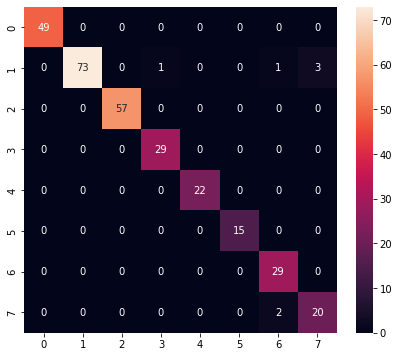

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      0.94      0.97        78
           2       1.00      1.00      1.00        57
           3       0.97      1.00      0.98        29
           4       1.00      1.00      1.00        22
           5       1.00      1.00      1.00        15
           6       0.91      1.00      0.95        29
           7       0.87      0.91      0.89        22

    accuracy                           0.98       301
   macro avg       0.97      0.98      0.97       301
weighted avg       0.98      0.98      0.98       301



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\marti\AppData\Local\Temp\tmpw4doe_7q\assets


6664

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.36489224e-01 3.48251499e-03 1.29367236e-05 7.92049923e-06
 2.12798454e-03 1.25049555e-05 2.02168077e-02 3.76501679e-02]
0
